In [2]:
# import yfinance as yf
# from hmmlearn import hmm
# from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import pandas as pd

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# prova = yf.download('BTC-EUR', start='2013-04-28', end='2024-03-10')
# prova

In [4]:
# # Supponiamo che 'dati' sia un DataFrame pandas con una colonna 'Price'
# prices = dati['Price'].values.reshape(-1, 1)

# # Normalizzazione dei dati
# scaler = StandardScaler()
# prices_norm = scaler.fit_transform(prices)

# # Creazione del modello HMM
# # Qui stiamo ipotizzando 3 stati nascosti per semplicità
# model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# # Addestramento del modello con i dati normalizzati
# model.fit(prices_norm)

# # Previsione degli stati nascosti per i dati esistenti
# hidden_states = model.predict(prices_norm)

# # Previsione dei prezzi futuri
# predicted_prices_norm = []
# for _ in range(7):
#     # Previsione dello stato nascosto successivo
#     next_state = model.transmat_[hidden_states[-1]].argmax()
    
#     # Generazione di una nuova osservazione (prezzo) basata sullo stato previsto
#     next_observation = model.sample(1, next_state)[0]
    
#     # Aggiunta della nuova osservazione alla lista
#     predicted_prices_norm.append(next_observation)
    
#     # Aggiornamento degli stati nascosti con il nuovo stato
#     hidden_states = np.append(hidden_states, next_state)

# # Trasformazione della lista di previsioni normalizzate in un array 2D
# predicted_prices_norm = np.array(predicted_prices_norm).reshape(-1, 1)

# # Trasformazione inversa delle previsioni normalizzate ai prezzi originali
# predicted_prices = scaler.inverse_transform(predicted_prices_norm)

# # Stampa dei prezzi previsti per i prossimi 7 giorni
# print("Prezzi previsti per i prossimi 7 giorni:", predicted_prices.flatten())

In [5]:
# import numpy as np
# from hmmlearn import hmm
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # Supponiamo che 'dati' sia un DataFrame pandas con una colonna 'Price'
# prices = dati['Price'].values.reshape(-1, 1)

# # Normalizzazione dei dati
# scaler = StandardScaler()
# prices_norm = scaler.fit_transform(prices)

# # Suddivisione dei dati per la validazione incrociata
# train_data, test_data = train_test_split(prices_norm, test_size=0.2, shuffle=False)

# # Creazione del modello HMM con parametri ottimizzati
# model = hmm.GaussianHMM(n_components=4, covariance_type="full", n_iter=1000)

# # Addestramento del modello con i dati di allenamento
# model.fit(train_data)

# # Previsione degli stati nascosti per i dati di test
# hidden_states = model.predict(test_data)

# # Generazione delle previsioni per i prossimi 7 giorni
# predicted_prices_norm = []
# for _ in range(7):
#     # Aggiornamento del modello con i dati più recenti
#     model.fit(np.concatenate((train_data, test_data[-30:])))  # Utilizzo degli ultimi 30 giorni per l'addestramento
#     next_state = model.transmat_[hidden_states[-1]].argmax()
#     next_observation = model.sample(1, next_state)[0]
#     predicted_prices_norm.append(next_observation)
#     hidden_states = np.append(hidden_states, next_state)

# # Trasformazione della lista di previsioni normalizzate in un array 2D
# predicted_prices_norm = np.array(predicted_prices_norm).reshape(-1, 1)

# # Trasformazione inversa delle previsioni normalizzate ai prezzi originali
# predicted_prices = scaler.inverse_transform(predicted_prices_norm)

# print("Prezzi previsti per i prossimi 7 giorni:", predicted_prices.flatten())

### Sequenze di + e -

In [6]:
dati = pd.read_csv('bitcoin_data.csv')
dati

,Timestamp,Price
0,2013-04-28 00:00:00.000,135.300000
1,2013-04-29 00:00:00.000,141.960000
2,2013-04-30 00:00:00.000,135.300000
3,2013-05-01 00:00:00.000,117.000000
4,2013-05-02 00:00:00.000,103.430000
...,...,...
3875,2023-12-09 00:00:00.000,44202.176109
3876,2023-12-10 00:00:00.000,43745.491992
3877,2023-12-11 00:00:00.000,43757.959938
3878,2023-12-12 00:00:00.000,41200.962726


In [7]:
# Faccio in modo che vengano sempre mostrate tutte le colonne delle tabella da qui in poi
pd.set_option('display.max_columns', None)

<h5> Scelgo quale porzione dei dati considerare </h5>

In [8]:
dati = dati[:]
dati

,Timestamp,Price
0,2013-04-28 00:00:00.000,135.300000
1,2013-04-29 00:00:00.000,141.960000
2,2013-04-30 00:00:00.000,135.300000
3,2013-05-01 00:00:00.000,117.000000
4,2013-05-02 00:00:00.000,103.430000
...,...,...
3875,2023-12-09 00:00:00.000,44202.176109
3876,2023-12-10 00:00:00.000,43745.491992
3877,2023-12-11 00:00:00.000,43757.959938
3878,2023-12-12 00:00:00.000,41200.962726


In [9]:
dati['Daily_return'] = dati['Price'].pct_change()
dati['State'] = np.where(dati['Daily_return'] >= 0 & dati['Daily_return'].notna(), "+", np.where(dati['Daily_return'].notna(), "-", float(np.nan)))
dati

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_45740\2749238732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati['Daily_return'] = dati['Price'].pct_change()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_45740\2749238732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati['State'] = np.where(dati['Daily_return'] >= 0 & dati['Daily_return'].notna(), "+", np.where(dati['Daily_return'].notna(), "-", float(np.nan)))


,Timestamp,Price,Daily_return,State
0,2013-04-28 00:00:00.000,135.300000,NaN,nan
1,2013-04-29 00:00:00.000,141.960000,0.049224,+
2,2013-04-30 00:00:00.000,135.300000,-0.046915,-
3,2013-05-01 00:00:00.000,117.000000,-0.135255,-
4,2013-05-02 00:00:00.000,103.430000,-0.115983,-
...,...,...,...,...
3875,2023-12-09 00:00:00.000,44202.176109,0.021540,+
3876,2023-12-10 00:00:00.000,43745.491992,-0.010332,-
3877,2023-12-11 00:00:00.000,43757.959938,0.000285,+
3878,2023-12-12 00:00:00.000,41200.962726,-0.058435,-


In [10]:
float(dati['State'][0])

nan

In [11]:
# Devo stare attento a non farmi confondere dal fatto che shift(-1) non serve a considerare il giorno precedente, ma serve a spostare indietro i dati di 1, e quindi in realtà col -1 si considera il giorno successivo

up_counts = dati.groupby('State')['State'].count()['+']
down_counts = dati.groupby('State')['State'].count()['-']
up_to_up = len(dati[(dati['State'] == '+') & (dati['State'].shift(-1) == '+')]) / up_counts
down_to_up = len(dati[(dati['State'] == '-') & (dati['State'].shift(-1) == '+')]) / down_counts
up_to_down = len(dati[(dati['State'] == '+') & (dati['State'].shift(-1) == '-')]) / up_counts
down_to_down = len(dati[(dati['State'] == '-') & (dati['State'].shift(-1) == '-')]) / down_counts
transition_matrix = pd.DataFrame({'+': [up_to_up, down_to_up], '-': [up_to_down, down_to_down]}, index=['+', '-'])
transition_matrix

,+,-
+,0.509434,0.490082
-,0.559051,0.440949


In [12]:
up_to_down

0.4900822447992259

In [13]:
down_to_up

0.5590507726269316

In [14]:
up_counts

2067

In [15]:
down_counts

1812

<h4> Ordine 2 in riga e colonna </h4>

In [16]:
# Crea una nuova colonna 'State_Pair' che rappresenta le coppie di stati consecutivi
pairs = []
for i in range(0, len(dati['State']), 2):
    pairs.append(dati['State'][i] + dati['State'][i+1])
dati['State_Pair'] = pd.Series(pairs)


# Calcola il conteggio di ogni coppia di stati
state_pair_counts = dati.groupby('State_Pair')['State_Pair'].count()

# Crea un dizionario vuoto per la matrice di transizione di ordine 2
transition_matrix_2 = {}

# Per ogni coppia di stati di partenza
for start_state in ['++', '+-', '-+', '--']:
    transition_probs = []
    # Per ogni coppia di stati di arrivo
    for end_state in ['++', '+-', '-+', '--']:
        # Calcola la probabilità di transizione
        if start_state in state_pair_counts:
            transition_prob = len(dati[(dati['State_Pair'] == start_state) & (dati['State_Pair'].shift(-1) == end_state)]) / state_pair_counts[start_state]
        else:
            transition_prob = 0
        transition_probs.append(transition_prob)
    # Aggiungi le probabilità di transizione alla matrice di transizione
    transition_matrix_2[start_state] = transition_probs


# Crea un DataFrame di pandas dalla matrice di transizione
transition_matrix_2 = pd.DataFrame(transition_matrix_2, index=['++', '+-', '-+', '--'])

transition_matrix_2.T

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_45740\271249964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati['State_Pair'] = pd.Series(pairs)


,++,+-,-+,--
++,0.268797,0.242481,0.270677,0.218045
+-,0.300797,0.282869,0.237052,0.179283
-+,0.236000,0.262000,0.280000,0.220000
--,0.296296,0.246914,0.239506,0.217284


In [17]:
dati

,Timestamp,Price,Daily_return,State,State_Pair
0,2013-04-28 00:00:00.000,135.300000,NaN,nan,nan+
1,2013-04-29 00:00:00.000,141.960000,0.049224,+,--
2,2013-04-30 00:00:00.000,135.300000,-0.046915,-,--
3,2013-05-01 00:00:00.000,117.000000,-0.135255,-,++
4,2013-05-02 00:00:00.000,103.430000,-0.115983,-,+-
...,...,...,...,...,...
3875,2023-12-09 00:00:00.000,44202.176109,0.021540,+,NaN
3876,2023-12-10 00:00:00.000,43745.491992,-0.010332,-,NaN
3877,2023-12-11 00:00:00.000,43757.959938,0.000285,+,NaN
3878,2023-12-12 00:00:00.000,41200.962726,-0.058435,-,NaN


<h4> Caso più generico possibile con ordine M in riga e N in colonna </h4>

In [18]:
import itertools
import pandas as pd

M=6
N=1


# Genera tutte le possibili combinazioni di '+' e '-' di lunghezza M e N
states_M = [''.join(x) for x in itertools.product(['+', '-'], repeat=M)]
states_N = [''.join(x) for x in itertools.product(['+', '-'], repeat=N)]

# Crea una nuova serie 'State_Seq' che rappresenta le sequenze di stati di lunghezza M
sequences_M = []
for i in range(0, len(dati['State']) - M + 1):
    sequences_M.append(''.join(dati['State'][i:i+M]))
state_seq_M = pd.Series(sequences_M, name='State_Seq')

# Crea una nuova serie 'Next_State_Seq' che rappresenta le sequenze di stati di lunghezza N
sequences_N = []
for i in range(M, len(dati['State']) - N + 1):
    sequences_N.append(''.join(dati['State'][i:i+N]))
next_state_seq_N = pd.Series(sequences_N, name='Next_State_Seq')

# Combina le due serie in un DataFrame
state_transitions = pd.concat([state_seq_M, next_state_seq_N], axis=1)

# Calcola il conteggio di ogni transizione di stato
state_transition_counts = state_transitions.groupby(['State_Seq', 'Next_State_Seq']).size()

# Crea un dizionario vuoto per la matrice di transizione
transition_matrix = {}

# Per ogni stato di partenza
for start_state in states_M:
    transition_probs = []
    # Per ogni stato di arrivo
    for end_state in states_N:
        # Calcola la probabilità di transizione
        if (start_state, end_state) in state_transition_counts:
            transition_prob = state_transition_counts[(start_state, end_state)] / state_transition_counts[start_state].sum()
        else:
            transition_prob = 0
        transition_probs.append(transition_prob)
    # Aggiungi le probabilità di transizione alla matrice di transizione
    transition_matrix[start_state] = transition_probs

# Crea un DataFrame di pandas dalla matrice di transizione
transition_matrix = pd.DataFrame(transition_matrix, index=states_N)

transition_matrix.T

,+,-
++++++,0.550000,0.450000
+++++-,0.636364,0.363636
++++-+,0.592105,0.407895
++++--,0.660000,0.340000
+++-++,0.527473,0.472527
...,...,...
---+--,0.543478,0.456522
----++,0.384615,0.615385
----+-,0.479167,0.520833
-----+,0.404255,0.595745


In [19]:
dati

,Timestamp,Price,Daily_return,State,State_Pair
0,2013-04-28 00:00:00.000,135.300000,NaN,nan,nan+
1,2013-04-29 00:00:00.000,141.960000,0.049224,+,--
2,2013-04-30 00:00:00.000,135.300000,-0.046915,-,--
3,2013-05-01 00:00:00.000,117.000000,-0.135255,-,++
4,2013-05-02 00:00:00.000,103.430000,-0.115983,-,+-
...,...,...,...,...,...
3875,2023-12-09 00:00:00.000,44202.176109,0.021540,+,NaN
3876,2023-12-10 00:00:00.000,43745.491992,-0.010332,-,NaN
3877,2023-12-11 00:00:00.000,43757.959938,0.000285,+,NaN
3878,2023-12-12 00:00:00.000,41200.962726,-0.058435,-,NaN


In [20]:
tabella_finale = transition_matrix.T.copy()
tabella_finale['Valore massimo'] = tabella_finale.max(axis=1)
tabella_finale['Rapporto massimo con la media'] = tabella_finale['Valore massimo'] / (1 /len(states_N)) # 1 / len(states_N) è il valore medio di ogni riga
tabella_finale['Indice di riga'] = tabella_finale.index
tabella_finale['Colonna valore massimo'] = tabella_finale.iloc[:, :len(states_N)].idxmax(axis=1) # Considero solo la porzione della tabella con i + e i - per il calcolo
tabella_finale['Numero di casi'] = [state_transition_counts.loc[indice, colonna] for indice, colonna in zip(tabella_finale['Indice di riga'], tabella_finale['Colonna valore massimo'])] # Rappresenta il numero di volte in cui nel dataset originale compare quella particolare sequenza, cioè quella indicata in riga seguita da quella indicata nella colonna corrispondente al valore massimo
tabella_finale['Punteggio'] = tabella_finale['Valore massimo'] * tabella_finale['Numero di casi']
tabella_finale

,+,-,Valore massimo,Rapporto massimo con la media,Indice di riga,Colonna valore massimo,Numero di casi,Punteggio
++++++,0.550000,0.450000,0.550000,1.100000,++++++,+,44,24.200000
+++++-,0.636364,0.363636,0.636364,1.272727,+++++-,+,42,26.727273
++++-+,0.592105,0.407895,0.592105,1.184211,++++-+,+,45,26.644737
++++--,0.660000,0.340000,0.660000,1.320000,++++--,+,33,21.780000
+++-++,0.527473,0.472527,0.527473,1.054945,+++-++,+,48,25.318681
...,...,...,...,...,...,...,...,...
---+--,0.543478,0.456522,0.543478,1.086957,---+--,+,25,13.586957
----++,0.384615,0.615385,0.615385,1.230769,----++,-,32,19.692308
----+-,0.479167,0.520833,0.520833,1.041667,----+-,-,25,13.020833
-----+,0.404255,0.595745,0.595745,1.191489,-----+,-,28,16.680851


In [21]:
# Trova l'indice della riga con il valore massimo nella colonna "Rapporto massimo con la media"
indice_max = tabella_finale['Valore massimo'].idxmax()

# Filtra la riga con l'indice trovato
riga_max = tabella_finale.loc[[indice_max]]
riga_max

,+,-,Valore massimo,Rapporto massimo con la media,Indice di riga,Colonna valore massimo,Numero di casi,Punteggio
------,0.714286,0.285714,0.714286,1.428571,------,+,15,10.714286


In [22]:
# Trova l'indice della riga con il valore massimo nella colonna "Rapporto massimo con la media"
indice_max = tabella_finale['Punteggio'].idxmax()

# Filtra la riga con l'indice trovato
riga_max = tabella_finale.loc[[indice_max]]
riga_max

,+,-,Valore massimo,Rapporto massimo con la media,Indice di riga,Colonna valore massimo,Numero di casi,Punteggio
+-+-+-,0.666667,0.333333,0.666667,1.333333,+-+-+-,+,60,40.0


In [23]:
tabella_finale['Rapporto massimo con la media'].std()

0.10892764231060811

### Confronto con il caso in cui i dati sono casuali

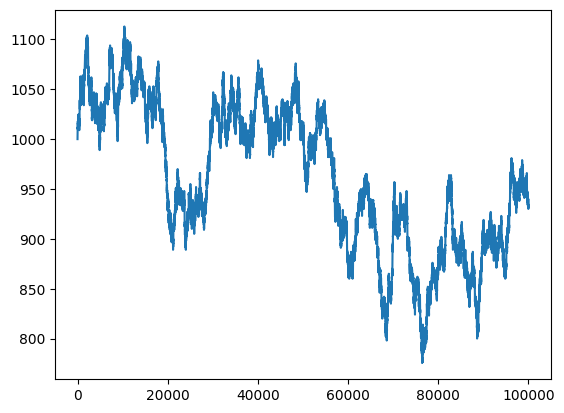

In [24]:
import random
import matplotlib.pyplot as plt

numero_dati = 100000

# Inizializza la lista con il primo valore
dati_casuali = [1000]

# Genera i dati casuali
for _ in range(numero_dati - 1):
    # Scegli se il prossimo dato deve salire o scendere
    if random.choice([True, False]):
        dati_casuali.append(dati_casuali[-1] + 1)
    else:
        dati_casuali.append(dati_casuali[-1] - 1)

dati_casuali = pd.DataFrame(columns=['Price'], data=dati_casuali)

# Mostra il grafico
plt.plot(dati_casuali)
plt.show()

In [25]:
dati_casuali['Daily_return'] = dati_casuali['Price'].pct_change()
dati_casuali['State'] = np.where(dati_casuali['Daily_return'] >= 0 & dati_casuali['Daily_return'].notna(), "+", np.where(dati_casuali['Daily_return'].notna(), "-", float(np.nan)))
dati_casuali

,Price,Daily_return,State
0,1000,NaN,nan
1,1001,0.001000,+
2,1002,0.000999,+
3,1003,0.000998,+
4,1004,0.000997,+
...,...,...,...
99995,931,-0.001073,-
99996,932,0.001074,+
99997,931,-0.001073,-
99998,932,0.001074,+


In [26]:
# Devo stare attento a non farmi confondere dal fatto che shift(-1) non serve a considerare il giorno precedente, ma serve a spostare indietro i dati_casuali di 1, e quindi in realtà col -1 si considera il giorno successivo

up_counts_casuali = dati_casuali.groupby('State')['State'].count()['+']
down_counts_casuali = dati_casuali.groupby('State')['State'].count()['-']
up_to_up_casuali = len(dati_casuali[(dati_casuali['State'] == '+') & (dati_casuali['State'].shift(-1) == '+')]) / up_counts_casuali
down_to_up_casuali = len(dati_casuali[(dati_casuali['State'] == '-') & (dati_casuali['State'].shift(-1) == '+')]) / down_counts_casuali
up_to_down_casuali = len(dati_casuali[(dati_casuali['State'] == '+') & (dati_casuali['State'].shift(-1) == '-')]) / up_counts_casuali
down_to_down_casuali = len(dati_casuali[(dati_casuali['State'] == '-') & (dati_casuali['State'].shift(-1) == '-')]) / down_counts_casuali
transition_matrix_casuale = pd.DataFrame({'+': [up_to_up_casuali, down_to_up_casuali], '-': [up_to_down_casuali, down_to_down_casuali]}, index=['+', '-'])
transition_matrix_casuale

,+,-
+,0.503602,0.496378
-,0.495713,0.504287


<h4> Caso più generico possibile con ordine M in riga e N in colonna </h4>

In [27]:
import itertools
import pandas as pd

# Li commento per lasciare che tenga i valori precedenti
# M=3
# N=4


# Genera tutte le possibili combinazioni di '+' e '-' di lunghezza M e N
states_M_casuali = [''.join(x) for x in itertools.product(['+', '-'], repeat=M)]
states_N_casuali = [''.join(x) for x in itertools.product(['+', '-'], repeat=N)]

# Crea una nuova serie 'State_Seq' che rappresenta le sequenze di stati di lunghezza M
sequences_M_casuali = []
for i in range(0, len(dati_casuali['State']) - M + 1):
    sequences_M_casuali.append(''.join(dati_casuali['State'][i:i+M]))
state_seq_M_casuali = pd.Series(sequences_M_casuali, name='State_Seq')

# Crea una nuova serie 'Next_State_Seq' che rappresenta le sequenze di stati di lunghezza N
sequences_N_casuali = []
for i in range(M, len(dati_casuali['State']) - N + 1):
    sequences_N_casuali.append(''.join(dati_casuali['State'][i:i+N]))
next_state_seq_N_casuali = pd.Series(sequences_N_casuali, name='Next_State_Seq')

# Combina le due serie in un DataFrame
state_transitions_casuali = pd.concat([state_seq_M_casuali, next_state_seq_N_casuali], axis=1)

# Calcola il conteggio di ogni transizione di stato
state_transition_counts_casuali = state_transitions_casuali.groupby(['State_Seq', 'Next_State_Seq']).size()

# Crea un dizionario vuoto per la matrice di transizione
transition_matrix_casuale = {}

# Per ogni stato di partenza
for start_state in states_M_casuali:
    transition_probs_casuali = []
    # Per ogni stato di arrivo
    for end_state in states_N_casuali:
        # Calcola la probabilità di transizione
        if (start_state, end_state) in state_transition_counts_casuali:
            transition_prob_casuali = state_transition_counts_casuali[(start_state, end_state)] / state_transition_counts_casuali[start_state].sum()
        else:
            transition_prob_casuali = 0
        transition_probs_casuali.append(transition_prob_casuali)
    # Aggiungi le probabilità di transizione alla matrice di transizione
    transition_matrix_casuale[start_state] = transition_probs_casuali

# Crea un DataFrame di pandas dalla matrice di transizione
transition_matrix_casuale = pd.DataFrame(transition_matrix_casuale, index=states_N_casuali)

transition_matrix_casuale.T

,+,-
++++++,0.504440,0.495560
+++++-,0.496565,0.503435
++++-+,0.503822,0.496178
++++--,0.507138,0.492862
+++-++,0.513791,0.486209
...,...,...
---+--,0.504744,0.495256
----++,0.525309,0.474691
----+-,0.510178,0.489822
-----+,0.500907,0.499093


In [28]:
dati_casuali

,Price,Daily_return,State
0,1000,NaN,nan
1,1001,0.001000,+
2,1002,0.000999,+
3,1003,0.000998,+
4,1004,0.000997,+
...,...,...,...
99995,931,-0.001073,-
99996,932,0.001074,+
99997,931,-0.001073,-
99998,932,0.001074,+


In [29]:
tabella_finale_casuali = transition_matrix_casuale.T.copy()
tabella_finale_casuali['Valore massimo'] = tabella_finale_casuali.max(axis=1)
tabella_finale_casuali['Rapporto massimo con la media'] = tabella_finale_casuali['Valore massimo'] / (1 /len(states_N_casuali)) # 1 / len(states_N) è il valore medio di ogni riga
tabella_finale_casuali['Indice di riga'] = tabella_finale_casuali.index
tabella_finale_casuali['Colonna valore massimo'] = tabella_finale_casuali.iloc[:, :len(states_N_casuali)].idxmax(axis=1) # Considero solo la porzione della tabella con i + e i - per il calcolo
tabella_finale_casuali['Numero di casi'] = [state_transition_counts_casuali.loc[indice, colonna] for indice, colonna in zip(tabella_finale_casuali['Indice di riga'], tabella_finale_casuali['Colonna valore massimo'])] # Rappresenta il numero di volte in cui nel dataset originale compare quella particolare sequenza, cioè quella indicata in riga seguita da quella indicata nella colonna corrispondente al valore massimo
tabella_finale_casuali['Punteggio'] = tabella_finale_casuali['Valore massimo'] * tabella_finale_casuali['Numero di casi']
tabella_finale_casuali

,+,-,Valore massimo,Rapporto massimo con la media,Indice di riga,Colonna valore massimo,Numero di casi,Punteggio
++++++,0.504440,0.495560,0.504440,1.008881,++++++,+,852,429.783304
+++++-,0.496565,0.503435,0.503435,1.006871,+++++-,-,806,405.768894
++++-+,0.503822,0.496178,0.503822,1.007643,++++-+,+,791,398.522930
++++--,0.507138,0.492862,0.507138,1.014277,++++--,+,817,414.332092
+++-++,0.513791,0.486209,0.513791,1.027582,+++-++,+,801,411.546504
...,...,...,...,...,...,...,...,...
---+--,0.504744,0.495256,0.504744,1.009488,---+--,+,798,402.785579
----++,0.525309,0.474691,0.525309,1.050617,----++,+,851,447.037654
----+-,0.510178,0.489822,0.510178,1.020356,----+-,+,802,409.162850
-----+,0.500907,0.499093,0.500907,1.001815,-----+,+,828,414.751361


In [30]:
# Trova l'indice della riga con il valore massimo nella colonna "Rapporto massimo con la media"
indice_max_casuali = tabella_finale_casuali['Valore massimo'].idxmax()

# Filtra la riga con l'indice trovato
riga_max_casuali = tabella_finale_casuali.loc[[indice_max_casuali]]
riga_max_casuali

,+,-,Valore massimo,Rapporto massimo con la media,Indice di riga,Colonna valore massimo,Numero di casi,Punteggio
------,0.534084,0.465916,0.534084,1.068168,------,+,854,456.107567


In [31]:
# Trova l'indice della riga con il valore massimo nella colonna "Rapporto massimo con la media"
indice_max_casuali = tabella_finale_casuali['Punteggio'].idxmax()

# Filtra la riga con l'indice trovato
riga_max_casuali = tabella_finale_casuali.loc[[indice_max_casuali]]
riga_max_casuali

,+,-,Valore massimo,Rapporto massimo con la media,Indice di riga,Colonna valore massimo,Numero di casi,Punteggio
------,0.534084,0.465916,0.534084,1.068168,------,+,854,456.107567


In [32]:
tabella_finale_casuali['Rapporto massimo con la media'].std()

0.017024732328928125

### Cerco il punteggio massimo nel dataset originale, al variare degli ordini di riga e colonna

In [33]:
import itertools
import pandas as pd

# Imposta gli intervalli di valori per N e M
intervallo_N = range(1, 5)
intervallo_M = range(1, 5)

# Inizializza le variabili per tenere traccia del valore massimo e delle corrispondenti combinazioni di N e M
massimo_globale = 0
N_massimo = 0
M_massimo = 0

# Itera su tutte le combinazioni di N e M
for N in intervallo_N:
    for M in intervallo_M:
        print(f'Mi sto occupando della combinazione N={N} e M={M}, la numero {M+(N-1)*len(intervallo_M)}/{len(intervallo_N)*len(intervallo_M)}...')

        # Genera tutte le possibili combinazioni di '+' e '-' di lunghezza M e N
        states_M = [''.join(x) for x in itertools.product(['+', '-'], repeat=M)]
        states_N = [''.join(x) for x in itertools.product(['+', '-'], repeat=N)]

        # Crea una nuova serie 'State_Seq' che rappresenta le sequenze di stati di lunghezza M
        sequences_M = []
        for i in range(0, len(dati['State']) - M + 1):
            sequences_M.append(''.join(dati['State'][i:i+M]))
        state_seq_M = pd.Series(sequences_M, name='State_Seq')

        # Crea una nuova serie 'Next_State_Seq' che rappresenta le sequenze di stati di lunghezza N
        sequences_N = []
        for i in range(M, len(dati['State']) - N + 1):
            sequences_N.append(''.join(dati['State'][i:i+N]))
        next_state_seq_N = pd.Series(sequences_N, name='Next_State_Seq')

        # Combina le due serie in un DataFrame
        state_transitions = pd.concat([state_seq_M, next_state_seq_N], axis=1)

        # Calcola il conteggio di ogni transizione di stato
        state_transition_counts = state_transitions.groupby(['State_Seq', 'Next_State_Seq']).size()

        # Crea un dizionario vuoto per la matrice di transizione
        transition_matrix_generale = {}

        # Per ogni stato di partenza
        for start_state in states_M:
            transition_probs = []
            # Per ogni stato di arrivo
            for end_state in states_N:
                # Calcola la probabilità di transizione
                if (start_state, end_state) in state_transition_counts:
                    transition_prob = state_transition_counts[(start_state, end_state)] / state_transition_counts[start_state].sum()
                else:
                    transition_prob = 0
                transition_probs.append(transition_prob)
            # Aggiungi le probabilità di transizione alla matrice di transizione
            transition_matrix_generale[start_state] = transition_probs

        # Crea un DataFrame di pandas dalla matrice di transizione
        transition_matrix_generale = pd.DataFrame(transition_matrix_generale, index=states_N)


        tabella_finale = transition_matrix_generale.T.copy()
        tabella_finale['Valore massimo'] = tabella_finale.max(axis=1)
        tabella_finale['Rapporto massimo con la media'] = tabella_finale['Valore massimo'] / (1 /len(states_N)) # 1 / len(states_N) è il valore medio di ogni riga
        tabella_finale['Indice di riga'] = tabella_finale.index
        tabella_finale['Colonna valore massimo'] = tabella_finale.iloc[:, :len(states_N)].idxmax(axis=1) # Considero solo la porzione della tabella con i + e i - per il calcolo
        # tabella_finale['Numero di casi'] = [state_transition_counts.loc[indice, colonna] for indice, colonna in zip(tabella_finale['Indice di riga'], tabella_finale['Colonna valore massimo'])] # Rappresenta il numero di volte in cui nel dataset originale compare quella particolare sequenza, cioè quella indicata in riga seguita da quella indicata nella colonna corrispondente al valore massimo
        tabella_finale['Numero di casi'] = [state_transition_counts.loc[indice, colonna] if (indice, colonna) in state_transition_counts.index else 0 for indice, colonna in zip(tabella_finale['Indice di riga'], tabella_finale['Colonna valore massimo'])] # Rappresenta il numero di volte in cui nel dataset originale compare quella particolare sequenza, cioè quella indicata in riga seguita da quella indicata nella colonna corrispondente al valore massimo
        tabella_finale['Punteggio'] = tabella_finale['Valore massimo'] * tabella_finale['Numero di casi']

        # Trova l'indice della riga con il valore massimo nella colonna "Rapporto massimo con la media"
        indice_max = tabella_finale['Punteggio'].idxmax()

        # Filtra la riga con l'indice trovato
        riga_max = tabella_finale.loc[[indice_max]]

        # Trova il massimo nella colonna "Rapporto massimo con la media"
        massimo_locale = tabella_finale['Punteggio'].max()

        # Se il massimo locale è maggiore del massimo globale, aggiorna il massimo globale e le corrispondenti combinazioni di N e M
        if massimo_locale > massimo_globale:
            massimo_globale = massimo_locale
            N_massimo = N
            M_massimo = M
        
        print(f'Massimo globale migliore trovato finora: {massimo_globale} con la combinazione N={N_massimo} e M={M_massimo}')

print(f'La combinazione di N e M che dà il valore massimo di "Punteggio" è N={N_massimo}, M={M_massimo} con un valore di {massimo_globale}.')

Mi sto occupando della combinazione N=1 e M=1, la numero 1/16...
Massimo globale migliore trovato finora: 566.3184326710817 con la combinazione N=1 e M=1
Mi sto occupando della combinazione N=1 e M=2, la numero 2/16...
Massimo globale migliore trovato finora: 566.3184326710817 con la combinazione N=1 e M=1
Mi sto occupando della combinazione N=1 e M=3, la numero 3/16...
Massimo globale migliore trovato finora: 566.3184326710817 con la combinazione N=1 e M=1
Mi sto occupando della combinazione N=1 e M=4, la numero 4/16...
Massimo globale migliore trovato finora: 566.3184326710817 con la combinazione N=1 e M=1
Mi sto occupando della combinazione N=2 e M=1, la numero 5/16...
Massimo globale migliore trovato finora: 566.3184326710817 con la combinazione N=1 e M=1
Mi sto occupando della combinazione N=2 e M=2, la numero 6/16...
Massimo globale migliore trovato finora: 566.3184326710817 con la combinazione N=1 e M=1
Mi sto occupando della combinazione N=2 e M=3, la numero 7/16...
Massimo glo

In [34]:
state_transition_counts

State_Seq  Next_State_Seq
++++       ++++              25
           +++-              19
           ++-+              22
           ++--              14
           +-++              26
                             ..
----       --++               5
           --+-              10
           ---+               4
           ----               2
nan+--     --++               1
Length: 257, dtype: int64

## Strategia di trading 1

In [35]:
def calcola_matrice_transizione(M, dati):
    N=1 # Tengo sempre l'ordine di arrivo uguale a 1


    # Genera tutte le possibili combinazioni di '+' e '-' di lunghezza M e N
    states_M = [''.join(x) for x in itertools.product(['+', '-'], repeat=M)]
    states_N = [''.join(x) for x in itertools.product(['+', '-'], repeat=N)]

    # Crea una nuova serie 'State_Seq' che rappresenta le sequenze di stati di lunghezza M
    sequences_M = []
    for i in range(0, len(dati['State']) - M + 1):
        sequences_M.append(''.join(dati['State'][i:i+M]))
    state_seq_M = pd.Series(sequences_M, name='State_Seq')

    # Crea una nuova serie 'Next_State_Seq' che rappresenta le sequenze di stati di lunghezza N
    sequences_N = []
    for i in range(M, len(dati['State']) - N + 1):
        sequences_N.append(''.join(dati['State'][i:i+N]))
    next_state_seq_N = pd.Series(sequences_N, name='Next_State_Seq')

    # Combina le due serie in un DataFrame
    state_transitions = pd.concat([state_seq_M, next_state_seq_N], axis=1)

    # Calcola il conteggio di ogni transizione di stato
    state_transition_counts = state_transitions.groupby(['State_Seq', 'Next_State_Seq']).size()

    # Crea un dizionario vuoto per la matrice di transizione
    transition_matrix = {}

    # Per ogni stato di partenza
    for start_state in states_M:
        transition_probs = []
        # Per ogni stato di arrivo
        for end_state in states_N:
            # Calcola la probabilità di transizione
            if (start_state, end_state) in state_transition_counts:
                transition_prob = state_transition_counts[(start_state, end_state)] / state_transition_counts[start_state].sum()
            else:
                transition_prob = 0
            transition_probs.append(transition_prob)
        # Aggiungi le probabilità di transizione alla matrice di transizione
        transition_matrix[start_state] = transition_probs

    # Crea un DataFrame di pandas dalla matrice di transizione
    transition_matrix = pd.DataFrame(transition_matrix, index=states_N)

    return transition_matrix.T

In [36]:
def calcola_matrice_transizione_media_pesata(ordine_di_partenza, dati):
    matrici_transizione = [calcola_matrice_transizione(ordine, dati) for ordine in range(1, ordine_di_partenza + 1)]
    matrice_pesata = matrici_transizione[-1].copy()

    for riga in matrice_pesata.index:
        for colonna in matrice_pesata.columns:
            valori = [matrici_transizione[i].loc[riga[-(i+1):], colonna] * (i+1) for i in range(ordine_di_partenza)] # Come pesi per la media pesata ho deciso di usare gli ordini
            matrice_pesata.loc[riga, colonna] = sum(valori) / sum(range(1, ordine_di_partenza + 1))

    return matrice_pesata

In [39]:
# dati = pd.read_csv('Bitcoin dal 01 01 2012 al 31 03 2021 con granularità al minuto (già inputato).csv')
# dati = dati[['Data', 'Close']]
# dati = dati.rename(columns = {'Data':'Timestamp', 'Close': 'Price'})

In [37]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})

In [38]:
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


In [39]:
dati['Daily_return'] = dati['Price'].pct_change()
dati['State'] = np.where(dati['Daily_return'] >= 0 & dati['Daily_return'].notna(), "+", np.where(dati['Daily_return'].notna(), "-", float(np.nan)))
dati

,Timestamp,Price,Daily_return,State
0,2014-09-17 00:00:00+00:00,355.957367,NaN,nan
1,2014-09-18 00:00:00+00:00,328.539368,-0.077026,-
2,2014-09-19 00:00:00+00:00,307.761139,-0.063244,-
3,2014-09-20 00:00:00+00:00,318.758972,0.035735,+
4,2014-09-21 00:00:00+00:00,310.632446,-0.025494,-
...,...,...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938,0.003347,+
3504,2024-04-21 00:00:00+00:00,60956.074219,0.018026,+
3505,2024-04-22 00:00:00+00:00,60919.242188,-0.000604,-
3506,2024-04-23 00:00:00+00:00,62729.296875,0.029712,+


In [40]:
dati_utili = dati.dropna().reset_index(drop=True)
dati_utili['Timestamp'] = pd.to_datetime(dati_utili['Timestamp'])
dati_utili['Timestamp'] = dati_utili['Timestamp'].dt.strftime('%Y-%m-%d')
dati_utili

,Timestamp,Price,Daily_return,State
0,2014-09-18,328.539368,-0.077026,-
1,2014-09-19,307.761139,-0.063244,-
2,2014-09-20,318.758972,0.035735,+
3,2014-09-21,310.632446,-0.025494,-
4,2014-09-22,312.958771,0.007489,+
...,...,...,...,...
3502,2024-04-20,59876.710938,0.003347,+
3503,2024-04-21,60956.074219,0.018026,+
3504,2024-04-22,60919.242188,-0.000604,-
3505,2024-04-23,62729.296875,0.029712,+


In [41]:
data_inizio_train = '2014-09-18'
data_fine_train = '2020-02-29'
indice_inizio_train = dati_utili[dati_utili['Timestamp'] == data_inizio_train].index[0]
indice_fine_train = dati_utili[dati_utili['Timestamp'] == data_fine_train].index[0]

In [42]:
dati_train = dati_utili[indice_inizio_train:indice_fine_train + 1].reset_index(drop=True)
dati_train

,Timestamp,Price,Daily_return,State
0,2014-09-18,328.539368,-0.077026,-
1,2014-09-19,307.761139,-0.063244,-
2,2014-09-20,318.758972,0.035735,+
3,2014-09-21,310.632446,-0.025494,-
4,2014-09-22,312.958771,0.007489,+
...,...,...,...,...
1986,2020-02-25,8586.521484,-0.034715,-
1987,2020-02-26,8103.854980,-0.056212,-
1988,2020-02-27,7986.993652,-0.014420,-
1989,2020-02-28,7864.468750,-0.015341,-


In [43]:
data_inizio = '2020-03-01'
data_fine = '2021-03-01'
indice_inizio_trading = dati_utili[dati_utili['Timestamp'] == data_inizio].index[0]
indice_fine_trading = dati_utili[dati_utili['Timestamp'] == data_fine].index[0]

In [44]:
dati_trading = dati_utili[indice_inizio_trading:indice_fine_trading + 1].reset_index(drop=True)
dati_trading

,Timestamp,Price,Daily_return,State
0,2020-03-01,7748.164551,-0.006394,-
1,2020-03-02,7959.358398,0.027257,+
2,2020-03-03,7862.485352,-0.012171,-
3,2020-03-04,7861.055176,-0.000182,-
4,2020-03-05,8089.786133,0.029097,+
...,...,...,...,...
361,2021-02-25,38735.164062,-0.051641,-
362,2021-02-26,38385.910156,-0.009016,-
363,2021-02-27,38260.480469,-0.003268,-
364,2021-02-28,37332.503906,-0.024254,-


In [45]:
dati_trading[:14]

,Timestamp,Price,Daily_return,State
0,2020-03-01,7748.164551,-0.006394,-
1,2020-03-02,7959.358398,0.027257,+
2,2020-03-03,7862.485352,-0.012171,-
3,2020-03-04,7861.055176,-0.000182,-
4,2020-03-05,8089.786133,0.029097,+
5,2020-03-06,8082.739746,-0.000871,-
6,2020-03-07,7894.343750,-0.023308,-
7,2020-03-08,7121.034180,-0.097957,-
8,2020-03-09,6952.206055,-0.023708,-
9,2020-03-10,6989.210938,0.005323,+


In [46]:
def trading_strategy(capitale, dati_trading, matrice_transizione_trasposta, M, perc_acquisto, perc_vendita):
    bitcoin_posseduti = 0
    totale_comprato = 0
    totale_venduto = 0
    movimenti = []
    azione = "-"
    quantita = 0
    deposito_e_bitcoin = capitale + bitcoin_posseduti * dati_trading['Price'].iloc[0]

    for i in range(M, len(dati_trading)):
        stato_corrente = dati_trading['State'].iloc[i-M:i].str.cat() #.str.cat() concatena tutte le stringhe nella serie in una singola stringa. In questo caso, sta concatenando tutti gli stati "+" o "-" in una singola stringa
        probabilita = matrice_transizione_trasposta.loc[stato_corrente]
        prezzo_corrente = dati_trading['Price'].iloc[i]

        if probabilita['+'] > probabilita['-']:  # Compra
            quantita = capitale * perc_acquisto
            totale_comprato += quantita
            capitale -= quantita
            bitcoin_posseduti += quantita / prezzo_corrente
            if quantita > 0:
                azione = 'Compra'
            else:
                azione = "-"
        elif bitcoin_posseduti > 0:  # Vendi
            quantita = bitcoin_posseduti * perc_vendita * prezzo_corrente
            totale_venduto += quantita
            capitale += quantita
            bitcoin_posseduti -= quantita / prezzo_corrente
            if quantita > 0:
                azione = 'Vendi'
            else:
                azione = "-"
                
        deposito_e_bitcoin = capitale + bitcoin_posseduti * prezzo_corrente

        movimenti.append((dati_trading['Timestamp'][i], i, prezzo_corrente, azione, quantita, capitale, bitcoin_posseduti, deposito_e_bitcoin, totale_comprato, totale_venduto))

    movimenti_df = pd.DataFrame(movimenti, columns=['Data', 'Giorno', 'Prezzo ($)', 'Azione', 'Quantità', 'Deposito ($)', 'Bitcoin posseduti', 'Deposito + Bitcoin ($)', 'Totale comprato ($)', 'Totale venduto ($)'])

    # Grafico
    plt.figure(figsize=(10,6))
    plt.plot(dati_trading['Price'])
    comprato = movimenti_df[movimenti_df['Azione'] == 'Compra']['Giorno']
    venduto = movimenti_df[movimenti_df['Azione'] == 'Vendi']['Giorno']
    plt.scatter(comprato, dati_trading['Price'].iloc[comprato], color='g')
    plt.scatter(venduto, dati_trading['Price'].iloc[venduto], color='r')
    plt.show()

    return movimenti_df

In [47]:
def trading_strategy_senza_grafico(capitale, dati_trading, matrice_transizione_trasposta, M, perc_acquisto, perc_vendita):
    bitcoin_posseduti = 0
    totale_comprato = 0
    totale_venduto = 0
    movimenti = []
    azione = "-"
    quantita = 0
    deposito_e_bitcoin = capitale + bitcoin_posseduti * dati_trading['Price'].iloc[0]

    for i in range(M, len(dati_trading)):
        stato_corrente = dati_trading['State'].iloc[i-M:i].str.cat() #.str.cat() concatena tutte le stringhe nella serie in una singola stringa. In questo caso, sta concatenando tutti gli stati "+" o "-" in una singola stringa
        probabilita = matrice_transizione_trasposta.loc[stato_corrente]
        prezzo_corrente = dati_trading['Price'].iloc[i]

        if probabilita['+'] > probabilita['-']:  # Compra
            quantita = capitale * perc_acquisto
            totale_comprato += quantita
            capitale -= quantita
            bitcoin_posseduti += quantita / prezzo_corrente
            if quantita > 0:
                azione = 'Compra'
            else:
                azione = "-"
        elif bitcoin_posseduti > 0:  # Vendi
            quantita = bitcoin_posseduti * perc_vendita * prezzo_corrente
            totale_venduto += quantita
            capitale += quantita
            bitcoin_posseduti -= quantita / prezzo_corrente
            if quantita > 0:
                azione = 'Vendi'
            else:
                azione = "-"
        
        deposito_e_bitcoin = capitale + bitcoin_posseduti * prezzo_corrente

        movimenti.append((dati_trading['Timestamp'][i], i, prezzo_corrente, azione, quantita, capitale, bitcoin_posseduti, deposito_e_bitcoin, totale_comprato, totale_venduto))

    movimenti_df = pd.DataFrame(movimenti, columns=['Data', 'Giorno', 'Prezzo ($)', 'Azione', 'Quantità', 'Deposito ($)', 'Bitcoin posseduti', 'Deposito + Bitcoin ($)', 'Totale comprato ($)', 'Totale venduto ($)'])

    return movimenti_df

In [114]:
ordine_di_partenza = 6

In [115]:
calcola_matrice_transizione(ordine_di_partenza, dati_train)

,+,-
++++++,0.444444,0.555556
+++++-,0.714286,0.285714
++++-+,0.734694,0.265306
++++--,0.533333,0.466667
+++-++,0.540000,0.460000
...,...,...
---+--,0.578947,0.421053
----++,0.578947,0.421053
----+-,0.571429,0.428571
-----+,0.400000,0.600000


In [116]:
matrice_transizione_media_pesata = calcola_matrice_transizione_media_pesata(ordine_di_partenza, dati_train)
matrice_transizione_media_pesata

,+,-
++++++,0.481362,0.518638
+++++-,0.623955,0.376045
++++-+,0.604106,0.395894
++++--,0.559803,0.440197
+++-++,0.538653,0.461347
...,...,...
---+--,0.584231,0.415769
----++,0.529410,0.470590
----+-,0.558965,0.441035
-----+,0.478184,0.521816


In [110]:
dati_trading

,Timestamp,Price,Daily_return,State
0,2020-03-01,7748.164551,-0.006394,-
1,2020-03-02,7959.358398,0.027257,+
2,2020-03-03,7862.485352,-0.012171,-
3,2020-03-04,7861.055176,-0.000182,-
4,2020-03-05,8089.786133,0.029097,+
...,...,...,...,...
361,2021-02-25,38735.164062,-0.051641,-
362,2021-02-26,38385.910156,-0.009016,-
363,2021-02-27,38260.480469,-0.003268,-
364,2021-02-28,37332.503906,-0.024254,-


In [119]:
# Inizializza una lista vuota per le previsioni
previsioni = []

matrice_transizione_scelta = matrice_transizione_media_pesata #calcola_matrice_transizione(ordine_di_partenza, dati_train)

# Scorri attraverso dati_trading in blocchi di ordine_di_partenza
for i in range(len(dati_trading) - ordine_di_partenza):
    # Prendi la sequenza corrente
    sequenza = dati_trading['State'].iloc[i:i+ordine_di_partenza].str.cat()
    
    # Ottieni la riga corrispondente nella matrice di transizione
    riga = matrice_transizione_scelta.loc[sequenza]
    
    # Prevedi il prossimo stato in base alla probabilità maggiore
    previsione = '+' if riga['+'] > riga['-'] else '-'
    
    # Aggiungi la previsione alla lista
    previsioni.append(previsione)

# Calcola l'accuratezza confrontando le previsioni con i veri stati
dati_veri = dati_trading['State'].iloc[ordine_di_partenza:]
accuratezza = np.mean([p == v for p, v in zip(previsioni, dati_veri)])

print(f"L'accuratezza della previsione è {accuratezza * 100:.2f}%")

L'accuratezza della previsione è 49.17%


In [51]:
matrice_transizione_media_pesata[matrice_transizione_media_pesata.index == '--+---']

,+,-
--+---,0.572979,0.427021


In [52]:
deposito_iniziale = 1000
perc_acquisto = 1
perc_vendita = 1

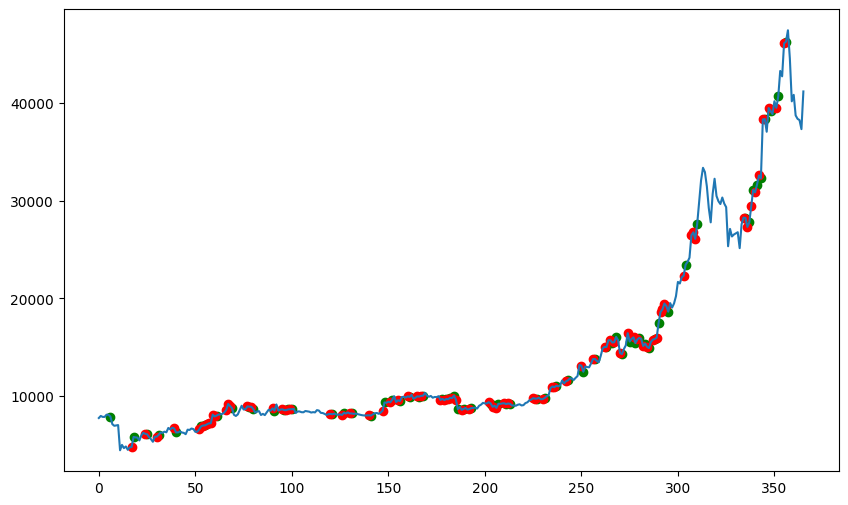

In [53]:
risultati = trading_strategy(deposito_iniziale, dati_trading, matrice_transizione_media_pesata, ordine_di_partenza, perc_acquisto, perc_vendita)

In [54]:
risultati

,Data,Giorno,Prezzo ($),Azione,Quantità,Deposito ($),Bitcoin posseduti,Deposito + Bitcoin ($),Totale comprato ($),Totale venduto ($)
0,2020-03-07,6,7894.343750,Compra,1000.0,0.0,0.126673,1000.000000,1000.000000,0.000000
1,2020-03-08,7,7121.034180,-,0.0,0.0,0.126673,902.042577,1000.000000,0.000000
2,2020-03-09,8,6952.206055,-,0.0,0.0,0.126673,880.656616,1000.000000,0.000000
3,2020-03-10,9,6989.210938,-,0.0,0.0,0.126673,885.344135,1000.000000,0.000000
4,2020-03-11,10,7024.827637,-,0.0,0.0,0.126673,889.855808,1000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
355,2021-02-25,361,38735.164062,-,0.0,0.0,0.067723,2623.248767,77258.302933,76258.302933
356,2021-02-26,362,38385.910156,-,0.0,0.0,0.067723,2599.596360,77258.302933,76258.302933
357,2021-02-27,363,38260.480469,-,0.0,0.0,0.067723,2591.101926,77258.302933,76258.302933
358,2021-02-28,364,37332.503906,-,0.0,0.0,0.067723,2528.256875,77258.302933,76258.302933


In [55]:
rendimento = risultati['Deposito + Bitcoin ($)'].iloc[-1] / risultati['Deposito + Bitcoin ($)'].iloc[0]
rendimento

2.789645221300107

### Grid search per trovare la combinazione che mi fa guadagnare di più

In [193]:
from sklearn.model_selection import ParameterGrid

deposito_iniziale = 1773

# Definisci i parametri per la grid search
param_grid = {'ordine_di_partenza': [12, 13, 14], 'perc_acquisto': [0.2, 0.4, 0.5, 0.6, 0.8, 1], 'perc_vendita': [0, 0.1, 0.2, 0.5, 0.8, 1]}

# Crea una griglia di parametri
grid = ParameterGrid(param_grid)

massimo_valore = -np.inf
migliori_parametri = None

# Calcolo e salvo in anticipo le matrici pesate, così non le ricalcolo ogni volta nella grid search e risparmio molto più tempo
matrici_pesate = {}
for ordine in param_grid['ordine_di_partenza']:
    matrici_pesate[ordine] = calcola_matrice_transizione_media_pesata(ordine, dati_train)

# Esegui la grid search
for cont, params in enumerate(grid):
    ordine_di_partenza = params['ordine_di_partenza']
    perc_acquisto = params['perc_acquisto']
    perc_vendita = params['perc_vendita']
    
    matrice_pesata = matrici_pesate[ordine_di_partenza]
    
    risultati = trading_strategy_senza_grafico(deposito_iniziale, dati_trading, matrice_pesata, ordine_di_partenza, perc_acquisto, perc_vendita)
    
    rendimento = risultati["Deposito + Bitcoin ($)"].iloc[-1] / risultati["Deposito + Bitcoin ($)"].iloc[0]
    
    if rendimento > massimo_valore:
        massimo_valore = rendimento
        migliori_parametri = params

    print(f"Combinazione {cont+1}/{len(grid)} ({params}, con rendimento = {rendimento}$):\nMigliori parametri trovati finora: {migliori_parametri}, con rendimento = {massimo_valore}$")

Combinazione 1/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0}, con rendimento = 7.827911529334004$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0}, con rendimento = 7.827911529334004$
Combinazione 2/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.1}, con rendimento = 5.002501352750755$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0}, con rendimento = 7.827911529334004$
Combinazione 3/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.2}, con rendimento = 3.6867212188155096$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0}, con rendimento = 7.827911529334004$
Combinazione 4/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.5}, con rendimento = 2.218845007321833$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'pe

## Strategia di trading 2

In [65]:
def calcola_matrice_transizione(M, dati):
    N=1 # Tengo sempre l'ordine di arrivo uguale a 1


    # Genera tutte le possibili combinazioni di '+' e '-' di lunghezza M e N
    states_M = [''.join(x) for x in itertools.product(['+', '-'], repeat=M)]
    states_N = [''.join(x) for x in itertools.product(['+', '-'], repeat=N)]

    # Crea una nuova serie 'State_Seq' che rappresenta le sequenze di stati di lunghezza M
    sequences_M = []
    for i in range(0, len(dati['State']) - M + 1):
        sequences_M.append(''.join(dati['State'][i:i+M]))
    state_seq_M = pd.Series(sequences_M, name='State_Seq')

    # Crea una nuova serie 'Next_State_Seq' che rappresenta le sequenze di stati di lunghezza N
    sequences_N = []
    for i in range(M, len(dati['State']) - N + 1):
        sequences_N.append(''.join(dati['State'][i:i+N]))
    next_state_seq_N = pd.Series(sequences_N, name='Next_State_Seq')

    # Combina le due serie in un DataFrame
    state_transitions = pd.concat([state_seq_M, next_state_seq_N], axis=1)

    # Calcola il conteggio di ogni transizione di stato
    state_transition_counts = state_transitions.groupby(['State_Seq', 'Next_State_Seq']).size()

    # Crea un dizionario vuoto per la matrice di transizione
    transition_matrix = {}

    # Per ogni stato di partenza
    for start_state in states_M:
        transition_probs = []
        # Per ogni stato di arrivo
        for end_state in states_N:
            # Calcola la probabilità di transizione
            if (start_state, end_state) in state_transition_counts:
                transition_prob = state_transition_counts[(start_state, end_state)] / state_transition_counts[start_state].sum()
            else:
                transition_prob = 0
            transition_probs.append(transition_prob)
        # Aggiungi le probabilità di transizione alla matrice di transizione
        transition_matrix[start_state] = transition_probs

    # Crea un DataFrame di pandas dalla matrice di transizione
    transition_matrix = pd.DataFrame(transition_matrix, index=states_N)

    return transition_matrix.T

In [66]:
def calcola_matrice_transizione_media_pesata(ordine_di_partenza, dati):
    matrici_transizione = [calcola_matrice_transizione(ordine, dati) for ordine in range(1, ordine_di_partenza + 1)]
    matrice_pesata = matrici_transizione[-1].copy()

    for riga in matrice_pesata.index:
        for colonna in matrice_pesata.columns:
            valori = [matrici_transizione[i].loc[riga[-(i+1):], colonna] * (i+1) for i in range(ordine_di_partenza)] # Come pesi per la media pesata ho deciso di usare gli ordini
            matrice_pesata.loc[riga, colonna] = sum(valori) / sum(range(1, ordine_di_partenza + 1))

    return matrice_pesata

In [122]:
# dati = pd.read_csv('Bitcoin dal 01 01 2012 al 31 03 2021 con granularità al minuto (già inputato).csv')
# dati = dati[['Data', 'Close']]
# dati = dati.rename(columns = {'Data':'Timestamp', 'Close': 'Price'})

In [67]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})

In [68]:
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


In [69]:
dati['Daily_return'] = dati['Price'].pct_change()
dati['State'] = np.where(dati['Daily_return'] >= 0 & dati['Daily_return'].notna(), "+", np.where(dati['Daily_return'].notna(), "-", float(np.nan)))
dati

,Timestamp,Price,Daily_return,State
0,2014-09-17 00:00:00+00:00,355.957367,NaN,nan
1,2014-09-18 00:00:00+00:00,328.539368,-0.077026,-
2,2014-09-19 00:00:00+00:00,307.761139,-0.063244,-
3,2014-09-20 00:00:00+00:00,318.758972,0.035735,+
4,2014-09-21 00:00:00+00:00,310.632446,-0.025494,-
...,...,...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938,0.003347,+
3504,2024-04-21 00:00:00+00:00,60956.074219,0.018026,+
3505,2024-04-22 00:00:00+00:00,60919.242188,-0.000604,-
3506,2024-04-23 00:00:00+00:00,62729.296875,0.029712,+


In [70]:
dati_utili = dati.dropna().reset_index(drop=True)
dati_utili['Timestamp'] = pd.to_datetime(dati_utili['Timestamp'])
dati_utili['Timestamp'] = dati_utili['Timestamp'].dt.strftime('%Y-%m-%d')
dati_utili

,Timestamp,Price,Daily_return,State
0,2014-09-18,328.539368,-0.077026,-
1,2014-09-19,307.761139,-0.063244,-
2,2014-09-20,318.758972,0.035735,+
3,2014-09-21,310.632446,-0.025494,-
4,2014-09-22,312.958771,0.007489,+
...,...,...,...,...
3502,2024-04-20,59876.710938,0.003347,+
3503,2024-04-21,60956.074219,0.018026,+
3504,2024-04-22,60919.242188,-0.000604,-
3505,2024-04-23,62729.296875,0.029712,+


In [ ]:
# data_inizio_train = '2011-12-31 07:53:00'
# data_fine_train = '2020-03-31 12:00:00'
# indice_inizio_train = dati_utili[dati_utili['Timestamp'] == data_inizio_train].index[0]
# indice_fine_train = dati_utili[dati_utili['Timestamp'] == data_fine_train].index[0]

In [71]:
data_inizio_train = '2014-09-18'
data_fine_train = '2020-02-29'
indice_inizio_train = dati_utili[dati_utili['Timestamp'] == data_inizio_train].index[0]
indice_fine_train = dati_utili[dati_utili['Timestamp'] == data_fine_train].index[0]

In [72]:
dati_train = dati_utili[indice_inizio_train:indice_fine_train + 1].reset_index(drop=True)
dati_train

,Timestamp,Price,Daily_return,State
0,2014-09-18,328.539368,-0.077026,-
1,2014-09-19,307.761139,-0.063244,-
2,2014-09-20,318.758972,0.035735,+
3,2014-09-21,310.632446,-0.025494,-
4,2014-09-22,312.958771,0.007489,+
...,...,...,...,...
1986,2020-02-25,8586.521484,-0.034715,-
1987,2020-02-26,8103.854980,-0.056212,-
1988,2020-02-27,7986.993652,-0.014420,-
1989,2020-02-28,7864.468750,-0.015341,-


In [74]:
# data_inizio_trading = '2020-03-31 12:01:00'
# data_fine_trading = '2021-03-31 00:00:00'
# indice_inizio_trading = dati_utili[dati_utili['Timestamp'] == data_inizio_trading].index[0]
# indice_fine_trading = dati_utili[dati_utili['Timestamp'] == data_fine_trading].index[0]

In [75]:
data_inizio_trading = '2020-03-01'
data_fine_trading = '2021-03-01'
indice_inizio_trading = dati_utili[dati_utili['Timestamp'] == data_inizio_trading].index[0]
indice_fine_trading = dati_utili[dati_utili['Timestamp'] == data_fine_trading].index[0]

In [76]:
dati_trading = dati_utili[indice_inizio_trading:indice_fine_trading + 1].reset_index(drop=True)
dati_trading

,Timestamp,Price,Daily_return,State
0,2020-03-01,7748.164551,-0.006394,-
1,2020-03-02,7959.358398,0.027257,+
2,2020-03-03,7862.485352,-0.012171,-
3,2020-03-04,7861.055176,-0.000182,-
4,2020-03-05,8089.786133,0.029097,+
...,...,...,...,...
361,2021-02-25,38735.164062,-0.051641,-
362,2021-02-26,38385.910156,-0.009016,-
363,2021-02-27,38260.480469,-0.003268,-
364,2021-02-28,37332.503906,-0.024254,-


In [77]:
dati_trading[:14]

,Timestamp,Price,Daily_return,State
0,2020-03-01,7748.164551,-0.006394,-
1,2020-03-02,7959.358398,0.027257,+
2,2020-03-03,7862.485352,-0.012171,-
3,2020-03-04,7861.055176,-0.000182,-
4,2020-03-05,8089.786133,0.029097,+
5,2020-03-06,8082.739746,-0.000871,-
6,2020-03-07,7894.343750,-0.023308,-
7,2020-03-08,7121.034180,-0.097957,-
8,2020-03-09,6952.206055,-0.023708,-
9,2020-03-10,6989.210938,0.005323,+


In [78]:
def trading_strategy2(capitale, dati_trading, matrice_transizione_trasposta, M, perc_acquisto, perc_vendita):
    bitcoin_posseduti = 0
    totale_comprato = 0
    totale_venduto = 0
    movimenti = []
    azione = "-"
    ultima_azione = 'Vendi'
    quantita = 0
    deposito_e_bitcoin = capitale + bitcoin_posseduti * dati_trading['Price'].iloc[0]

    for i in range(M, len(dati_trading)):
        stato_corrente = dati_trading['State'].iloc[i-M:i].str.cat() #.str.cat() concatena tutte le stringhe nella serie in una singola stringa. In questo caso, sta concatenando tutti gli stati "+" o "-" in una singola stringa
        probabilita = matrice_transizione_trasposta.loc[stato_corrente]
        prezzo_corrente = dati_trading['Price'].iloc[i]

        if probabilita['+'] > probabilita['-'] and ultima_azione == 'Vendi':  # Compra
            quantita = capitale * perc_acquisto
            totale_comprato += quantita
            capitale -= quantita
            bitcoin_posseduti += quantita / prezzo_corrente
            if quantita > 0:
                ultimo_prezzo_acquisto = dati_trading['Price'].iloc[i]
                azione = 'Compra'
                ultima_azione = 'Compra'
            else:
                azione = '-'
        elif probabilita['+'] < probabilita['-'] and bitcoin_posseduti > 0 and ultima_azione == 'Compra' and dati_trading['Price'].iloc[i] > ultimo_prezzo_acquisto:  # Vendi
            quantita = bitcoin_posseduti * perc_vendita * prezzo_corrente
            totale_venduto += quantita
            capitale += quantita
            bitcoin_posseduti -= quantita / prezzo_corrente
            if quantita > 0:
                azione = 'Vendi'
                ultima_azione = 'Vendi'
            else:
                azione = '-'
        else:
            azione = '-'

        deposito_e_bitcoin = capitale + bitcoin_posseduti * prezzo_corrente

        movimenti.append((dati_trading['Timestamp'][i], i, prezzo_corrente, azione, quantita, capitale, bitcoin_posseduti, deposito_e_bitcoin, totale_comprato, totale_venduto))

    movimenti_df = pd.DataFrame(movimenti, columns=['Data', 'Giorno', 'Prezzo ($)', 'Azione', 'Quantità', 'Deposito ($)', 'Bitcoin posseduti', 'Deposito + Bitcoin ($)', 'Totale comprato ($)', 'Totale venduto ($)'])

    # Grafico
    plt.figure(figsize=(10,6))
    plt.plot(dati_trading['Price'])
    comprato = movimenti_df[movimenti_df['Azione'] == 'Compra']['Giorno']
    venduto = movimenti_df[movimenti_df['Azione'] == 'Vendi']['Giorno']
    plt.scatter(comprato, dati_trading['Price'].iloc[comprato], color='g')
    plt.scatter(venduto, dati_trading['Price'].iloc[venduto], color='r')
    plt.show()

    return movimenti_df

In [79]:
def trading_strategy2_senza_grafico(capitale, dati_trading, matrice_transizione_trasposta, M, perc_acquisto, perc_vendita):
    bitcoin_posseduti = 0
    totale_comprato = 0
    totale_venduto = 0
    movimenti = []
    azione = "-"
    ultima_azione = 'Vendi'
    quantita = 0
    deposito_e_bitcoin = capitale + bitcoin_posseduti * dati_trading['Price'].iloc[0]

    for i in range(M, len(dati_trading)):
        stato_corrente = dati_trading['State'].iloc[i-M:i].str.cat() #.str.cat() concatena tutte le stringhe nella serie in una singola stringa. In questo caso, sta concatenando tutti gli stati "+" o "-" in una singola stringa
        probabilita = matrice_transizione_trasposta.loc[stato_corrente]
        prezzo_corrente = dati_trading['Price'].iloc[i]

        if probabilita['+'] > probabilita['-'] and ultima_azione == 'Vendi':  # Compra
            quantita = capitale * perc_acquisto
            totale_comprato += quantita
            capitale -= quantita
            bitcoin_posseduti += quantita / prezzo_corrente
            if quantita > 0:
                ultimo_prezzo_acquisto = dati_trading['Price'].iloc[i]
                azione = 'Compra'
                ultima_azione = 'Compra'
            else:
                azione = '-'
        elif probabilita['+'] < probabilita['-'] and bitcoin_posseduti > 0 and ultima_azione == 'Compra' and dati_trading['Price'].iloc[i] > ultimo_prezzo_acquisto:  # Vendi
            quantita = bitcoin_posseduti * perc_vendita * prezzo_corrente
            totale_venduto += quantita
            capitale += quantita
            bitcoin_posseduti -= quantita / prezzo_corrente
            if quantita > 0:
                azione = 'Vendi'
                ultima_azione = 'Vendi'
            else:
                azione = '-'
        else:
            azione = '-'

        deposito_e_bitcoin = capitale + bitcoin_posseduti * prezzo_corrente

        movimenti.append((dati_trading['Timestamp'][i], i, prezzo_corrente, azione, quantita, capitale, bitcoin_posseduti, deposito_e_bitcoin, totale_comprato, totale_venduto))

    movimenti_df = pd.DataFrame(movimenti, columns=['Data', 'Giorno', 'Prezzo ($)', 'Azione', 'Quantità', 'Deposito ($)', 'Bitcoin posseduti', 'Deposito + Bitcoin ($)', 'Totale comprato ($)', 'Totale venduto ($)'])

    return movimenti_df

In [82]:
ordine_di_partenza = 6

In [83]:
calcola_matrice_transizione(ordine_di_partenza, dati_train)

,+,-
++++++,0.444444,0.555556
+++++-,0.714286,0.285714
++++-+,0.734694,0.265306
++++--,0.533333,0.466667
+++-++,0.540000,0.460000
...,...,...
---+--,0.578947,0.421053
----++,0.578947,0.421053
----+-,0.571429,0.428571
-----+,0.400000,0.600000


In [84]:
matrice_transizione_media_pesata = calcola_matrice_transizione_media_pesata(ordine_di_partenza, dati_train)
matrice_transizione_media_pesata

,+,-
++++++,0.481362,0.518638
+++++-,0.623955,0.376045
++++-+,0.604106,0.395894
++++--,0.559803,0.440197
+++-++,0.538653,0.461347
...,...,...
---+--,0.584231,0.415769
----++,0.529410,0.470590
----+-,0.558965,0.441035
-----+,0.478184,0.521816


In [85]:
deposito_iniziale = 1000
perc_acquisto = 1
perc_vendita = 1

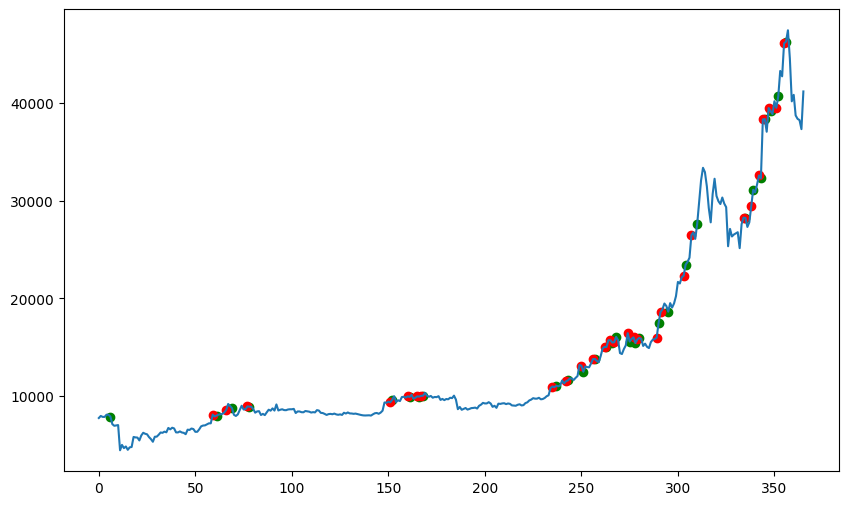

In [86]:
risultati = trading_strategy2(deposito_iniziale, dati_trading, matrice_transizione_media_pesata, ordine_di_partenza, perc_acquisto, perc_vendita)

In [87]:
risultati

,Data,Giorno,Prezzo ($),Azione,Quantità,Deposito ($),Bitcoin posseduti,Deposito + Bitcoin ($),Totale comprato ($),Totale venduto ($)
0,2020-03-07,6,7894.343750,Compra,1000.00000,0.0,0.126673,1000.000000,1000.000000,0.000000
1,2020-03-08,7,7121.034180,-,1000.00000,0.0,0.126673,902.042577,1000.000000,0.000000
2,2020-03-09,8,6952.206055,-,1000.00000,0.0,0.126673,880.656616,1000.000000,0.000000
3,2020-03-10,9,6989.210938,-,1000.00000,0.0,0.126673,885.344135,1000.000000,0.000000
4,2020-03-11,10,7024.827637,-,1000.00000,0.0,0.126673,889.855808,1000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
355,2021-02-25,361,38735.164062,-,4899.17253,0.0,0.105829,4099.290568,65749.261566,64749.261566
356,2021-02-26,362,38385.910156,-,4899.17253,0.0,0.105829,4062.329495,65749.261566,64749.261566
357,2021-02-27,363,38260.480469,-,4899.17253,0.0,0.105829,4049.055439,65749.261566,64749.261566
358,2021-02-28,364,37332.503906,-,4899.17253,0.0,0.105829,3950.848921,65749.261566,64749.261566


In [88]:
rendimento = risultati['Deposito + Bitcoin ($)'].iloc[-1] / risultati['Deposito + Bitcoin ($)'].iloc[0]
rendimento

4.359314483375799

In [89]:
risultati[risultati['Azione'] == 'Compra']

,Data,Giorno,Prezzo ($),Azione,Quantità,Deposito ($),Bitcoin posseduti,Deposito + Bitcoin ($),Totale comprato ($),Totale venduto ($)
0,2020-03-07,6,7894.343750,Compra,1000.000000,0.0,0.126673,1000.000000,1000.000000,0.000000
55,2020-05-01,61,7990.958008,Compra,1025.005356,0.0,0.128271,1025.005356,2025.005356,1025.005356
63,2020-05-09,69,8745.182617,Compra,1100.912894,0.0,0.125888,1100.912894,3125.918250,2125.918250
72,2020-05-18,78,8911.886719,Compra,1125.279707,0.0,0.126267,1125.279707,4251.197957,3251.197957
146,2020-07-31,152,9613.430664,Compra,1181.446205,0.0,0.122895,1181.446205,5432.644162,4432.644162
155,2020-08-09,161,9910.367188,Compra,1225.325376,0.0,0.123641,1225.325376,6657.969538,5657.969538
160,2020-08-14,166,9937.870117,Compra,1233.035537,0.0,0.124074,1233.035537,7891.005075,6891.005075
162,2020-08-16,168,10034.041992,Compra,1243.184679,0.0,0.123897,1243.184679,9134.189754,8134.189754
231,2020-10-24,237,11050.004883,Compra,1359.538683,0.0,0.123035,1359.538683,10493.728437,9493.728437
237,2020-10-30,243,11602.596680,Compra,1415.756121,0.0,0.122021,1415.756121,11909.484557,10909.484557


In [90]:
risultati[risultati['Azione'] == 'Vendi']

,Data,Giorno,Prezzo ($),Azione,Quantità,Deposito ($),Bitcoin posseduti,Deposito + Bitcoin ($),Totale comprato ($),Totale venduto ($)
53,2020-04-29,59,8091.744629,Vendi,1025.005356,1025.005356,0.000000e+00,1025.005356,1000.000000,1025.005356
60,2020-05-06,66,8582.734375,Vendi,1100.912894,1100.912894,0.000000e+00,1100.912894,2025.005356,2125.918250
71,2020-05-17,77,8938.742188,Vendi,1125.279707,1125.279707,0.000000e+00,1125.279707,3125.918250,3251.197957
145,2020-07-30,151,9356.708984,Vendi,1181.446205,1181.446205,0.000000e+00,1181.446205,4251.197957,4432.644162
154,2020-08-08,160,9970.475586,Vendi,1225.325376,1225.325376,0.000000e+00,1225.325376,5432.644162,5657.969538
159,2020-08-13,165,9972.726562,Vendi,1233.035537,1233.035537,1.387779e-17,1233.035537,6657.969538,6891.005075
161,2020-08-15,167,10019.668945,Vendi,1243.184679,1243.184679,1.387779e-17,1243.184679,7891.005075,8134.189754
229,2020-10-22,235,10973.163086,Vendi,1359.538683,1359.538683,1.387779e-17,1359.538683,9134.189754,9493.728437
236,2020-10-29,242,11506.926758,Vendi,1415.756121,1415.756121,0.000000e+00,1415.756121,10493.728437,10909.484557
244,2020-11-06,250,13109.102539,Vendi,1599.580910,1599.580910,0.000000e+00,1599.580910,11909.484557,12509.065468


In [91]:
rendimento_massimo = risultati['Prezzo ($)'].max() / risultati['Prezzo ($)'].min()
rendimento_massimo

10.678125794485881

In [92]:
guadagno_massimo = deposito_iniziale / risultati['Prezzo ($)'].min() * risultati['Prezzo ($)'].max()
guadagno_massimo

10678.12579448588

In [93]:
punteggio_rendimento = rendimento / rendimento_massimo
punteggio_rendimento

0.40824715565974345

### Grid search per trovare la combinazione che mi fa guadagnare di più

In [109]:
from sklearn.model_selection import ParameterGrid

deposito_iniziale = 1773

# Definisci i parametri per la grid search
param_grid = {'ordine_di_partenza': [12, 13, 14], 'perc_acquisto': [0.2, 0.4, 0.5, 0.6, 0.8, 1], 'perc_vendita': [0, 0.1, 0.2, 0.5, 0.8, 1]}

# Crea una griglia di parametri
grid = ParameterGrid(param_grid)

massimo_valore = -np.inf
migliori_parametri = None

# Calcolo e salvo in anticipo le matrici pesate, così non le ricalcolo ogni volta nella grid search e risparmio molto più tempo
matrici_pesate = {}
for ordine in param_grid['ordine_di_partenza']:
    matrici_pesate[ordine] = calcola_matrice_transizione_media_pesata(ordine, dati_train)

# Esegui la grid search
for cont, params in enumerate(grid):
    ordine_di_partenza = params['ordine_di_partenza']
    perc_acquisto = params['perc_acquisto']
    perc_vendita = params['perc_vendita']
    
    matrice_pesata = matrici_pesate[ordine_di_partenza]
    
    risultati = trading_strategy2_senza_grafico(deposito_iniziale, dati_trading, matrice_pesata, ordine_di_partenza, perc_acquisto, perc_vendita)
    
    rendimento = risultati["Deposito + Bitcoin ($)"].iloc[-1] / risultati["Deposito + Bitcoin ($)"].iloc[0]
    
    if rendimento > massimo_valore:
        massimo_valore = rendimento
        migliori_parametri = params

    print(f"Combinazione {cont+1}/{len(grid)} ({params}, con rendimento = {rendimento}$):\nMigliori parametri trovati finora: {migliori_parametri}, con rendimento = {massimo_valore}$")

Combinazione 1/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0}, con rendimento = 2.4000868928098082$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0}, con rendimento = 2.4000868928098082$
Combinazione 2/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.1}, con rendimento = 4.769494477899275$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.1}, con rendimento = 4.769494477899275$
Combinazione 3/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.2}, con rendimento = 3.4219968565230157$):
Migliori parametri trovati finora: {'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.1}, con rendimento = 4.769494477899275$
Combinazione 4/108 ({'ordine_di_partenza': 12, 'perc_acquisto': 0.2, 'perc_vendita': 0.5}, con rendimento = 2.0144259632884456$):
Migliori parametri trovati finora: {'ordine_di_partenza': 

## Strategia di trading 3